In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dados Contínuos

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
glassdoor = pd.read_csv('drive/MyDrive/Case Turing/2_analise-e-ia/glassdoor-gender-pay-gap.csv')  # Leitura do dataset

## Informações gerais sobre o dataset:

In [9]:
glassdoor.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [10]:
glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
glassdoor.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


#### O desvio padrão do salário é muito maior que as outras features, o que nos permite concluir que há muita variação.


## Distribuição das Features Contínuas:

### Idades

Text(0, 0.5, 'Quantidade')

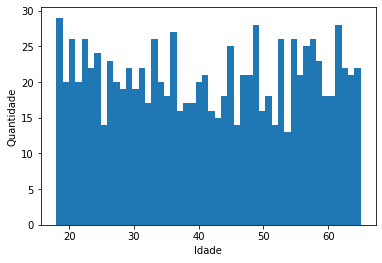

In [12]:
plt.hist(glassdoor['Age'], bins=48)  # 48 é o número de idades entre 18 e 65 anos.
plt.xlabel('Idade')
plt.ylabel('Quantidade')

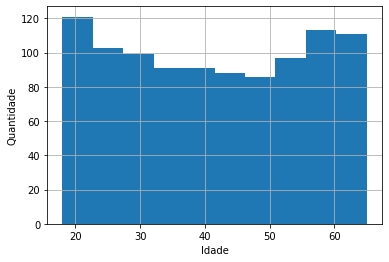

In [13]:
glassdoor['Age'].hist()
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

#### Se for feita uma divisão por cada idade, não há muito o que concluir sobre a distribuição, mas se a divisão for feita por faixas de idade, percebe-se que há mais pessoas com idades entre 18 e 25 anos, e entre 55 e 65 anos.

### Salário

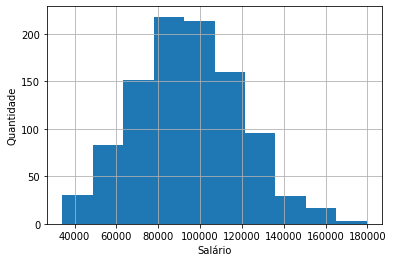

In [14]:
glassdoor['BasePay'].hist()
plt.xlabel('Salário')
plt.ylabel('Quantidade')
plt.show()

#### Os salários seguem aproximadamente uma distribuição normal, sendo que a média é por volta de 90 mil dólares anuais.

### Bonus Salarial

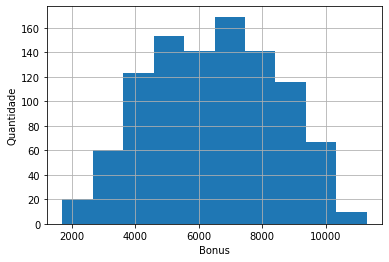

In [15]:
glassdoor['Bonus'].hist()
plt.xlabel('Bonus')
plt.ylabel('Quantidade')
plt.show()

#### O bonus salarial também segue uma distribuição aproximadamente normal, com uma média de aproximadamente 6,5 mil dólares anuais.

### Senioridade

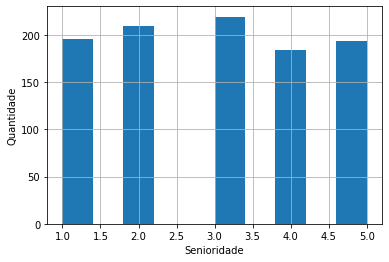

In [16]:
glassdoor['Seniority'].hist()
plt.xlabel('Senioridade')
plt.ylabel('Quantidade')
plt.show()

#### A senioridade tem um pico aos 3 anos, seguido de uma pequena queda, o que pode indicar que a maioria das pessoas que deixam um determinado cargo ou empresa, fazem isso após passados 3 anos.

### Correlação Linear

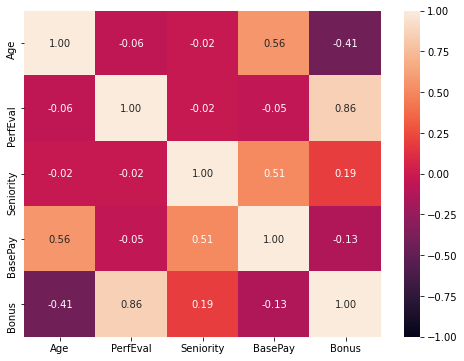

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(glassdoor.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

#### *   A idade tem correlação moderada com o salário e o bônus;
#### *   A avaliação de performance tem correlação forte com o bônus, algo que é esperado;
#### *   A senioridade tem correlação moderada com o salário;

#### Abaixo estão os gráficos que ilustram cada uma dessas correlações individualmente.

### Idade x Salário

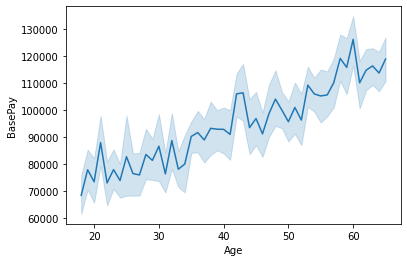

In [18]:
sns.lineplot(x ='Age', y ='BasePay', data = glassdoor)

### Idade x Bônus

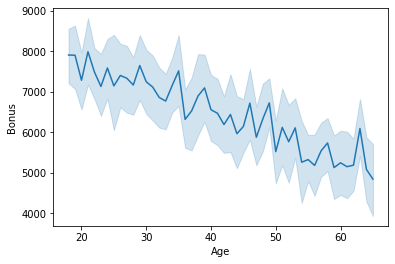

In [19]:
sns.lineplot(x ='Age', y ='Bonus', data = glassdoor)

### Avaliação de Performance x Bônus

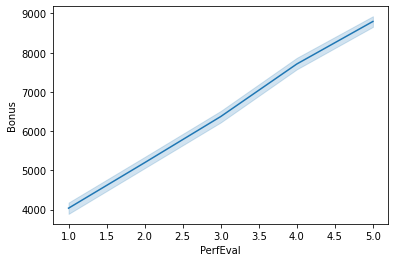

In [20]:
sns.lineplot(x ='PerfEval', y ='Bonus', data = glassdoor)

### Senioridade x Salário

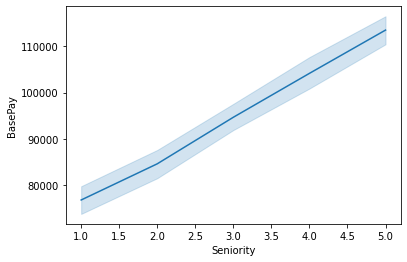

In [21]:
sns.lineplot(x ='Seniority', y ='BasePay', data = glassdoor)

### Salário x Bonus x Idade

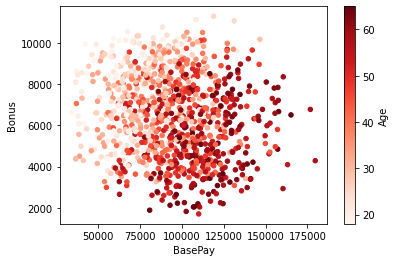

In [22]:
glassdoor.plot(x='BasePay', y='Bonus', c='Age',
          cmap='Reds', kind='scatter', sharex=False)
plt.show()

#### Com esse gráfico pode-se concluir que em geral os mais novos ganham um salário menor e ganham um bônus maior, em contrapartida, os mais velhos ganham maiores salários e ganham um bônus menor. Isso ocorre provavelmente por conta da experiência e capacitações adquiridas ao longo da vida profissional.

#### Apenas com a análise das features contínuas não se pode concluir nada sobre se o gênero influencia no salário, já que gênero é uma feature categórica e não foi analisada até o momento, o que será feito na próxima seção.

# Dados Categóricos

## Distribuição por empregos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


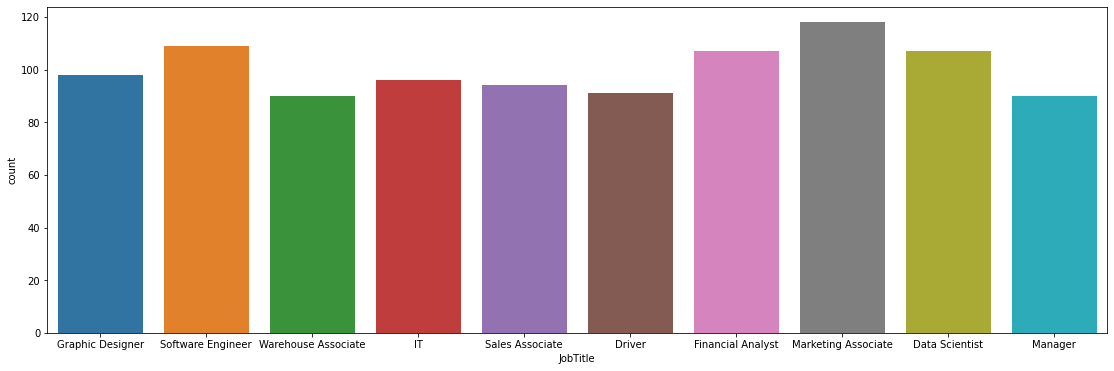

In [ ]:
plt.figure(figsize=(19, 6))
sns.countplot(glassdoor['JobTitle'])
plt.show()

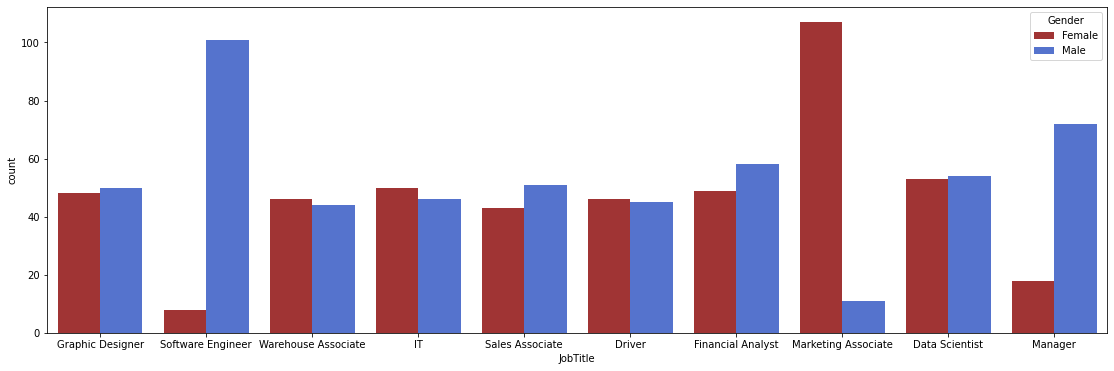

In [ ]:
plt.figure(figsize=(19, 6))
sns.countplot(x='JobTitle', hue='Gender', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

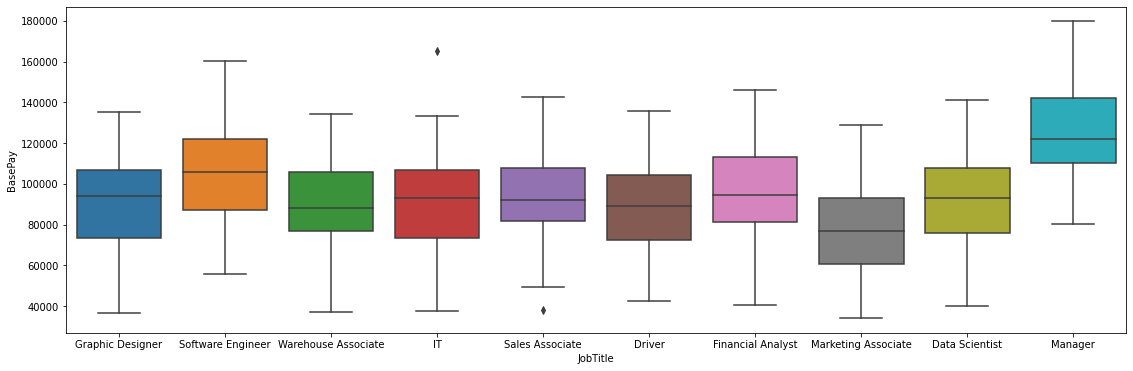

In [ ]:
plt.figure(figsize=(19, 6))
sns.boxplot(x='JobTitle', y='BasePay', data=glassdoor)
plt.show()

#### Logo de início, já podemos perceber que os empregos que são ocupados em sua maior parte pelo gênero masculino tendem a apresentar maiores salários, com destaque para Engenheiro de Software e Gerente (que tem o maior salário apresentado). E empregos que são ocupados em sua maior parte pelo gênero feminino tendem a apresentar menores salários, sendo que a menor mediana foi a de Marketing Associate (que tem o menor salário apresentado).

## Distribuição por grau de escolaridade

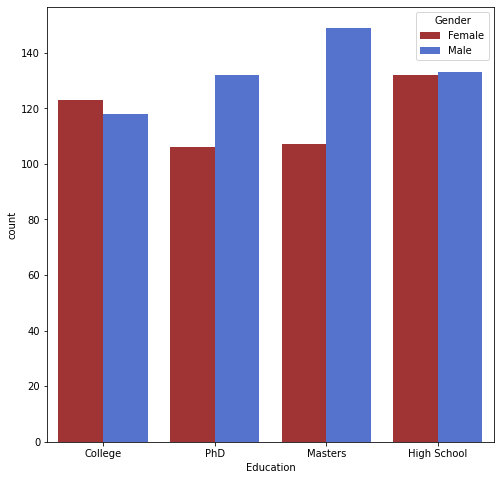

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Education', hue='Gender', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

## Distribuição por Avaliação de Perfomance

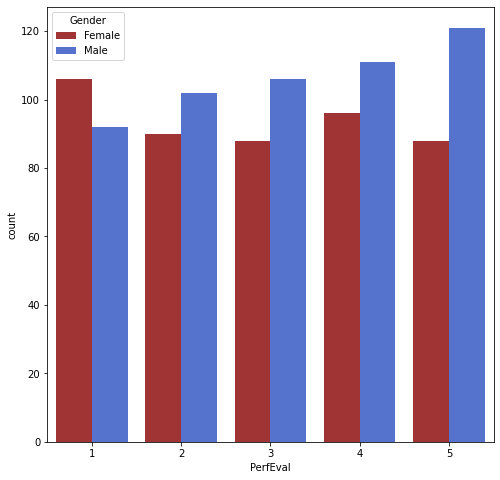

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='PerfEval', hue='Gender', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

#### Um ponto importante a ser destacado sobre este gráfico é que a avaliação de performance tende a ser maior para homens do que para mulheres, e vimos anteriormente que ela está diretamente ligada com o bônus, ou seja, pode-se concluir que as mulheres no geral ganham menores bônus.

## Distribuição por Senioridade

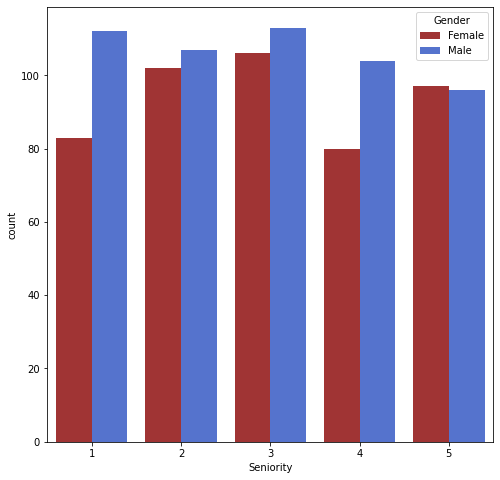

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Seniority', hue='Gender', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

## Análise de salários por gênero

### Visão Geral

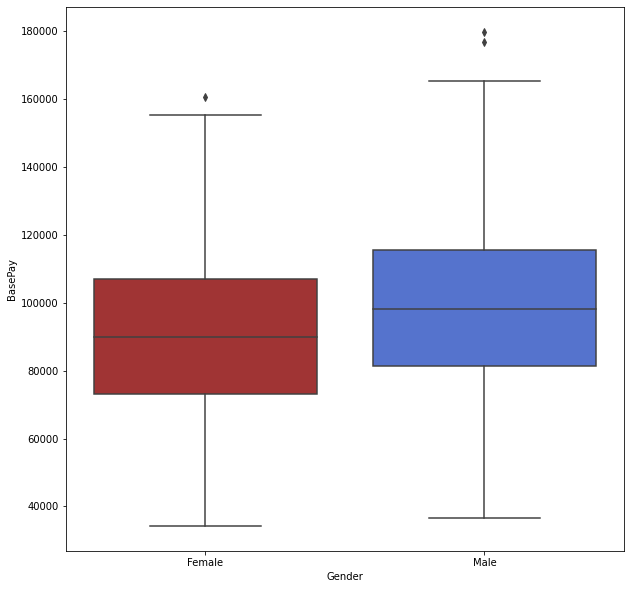

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

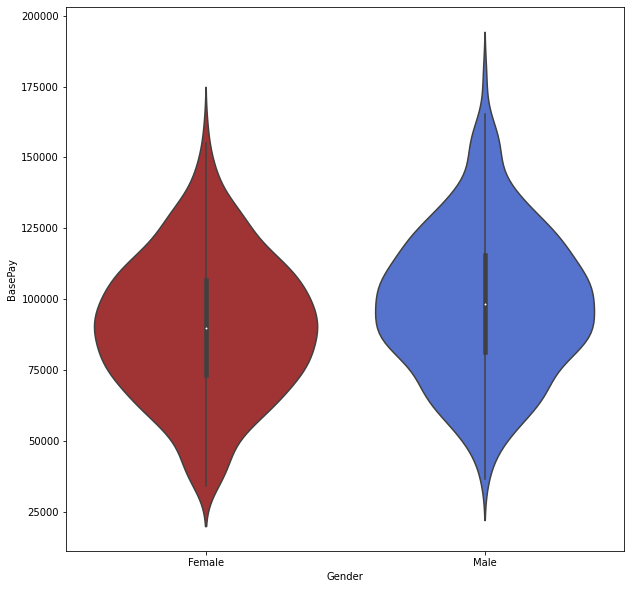

In [ ]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='Gender', y='BasePay', data=glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

#### Sem levar em consideração a diferença por tipo de emprego, esses boxplots mostram que os homens possuem salários maiores, o maior salário é de um homem, mesmo levando em conta o outlier do boxplot do gênero feminino, e o menor salário é de uma mulher.

#### Abaixo foram escolhidos alguns tipos de emprego específicos para fazer uma análise mais aprofundada, que são: Cientista de Dados, Designer Gráfico, Warehouse Associate, Motorista e Engenheiro de Software. Os quatro primeiros foram escolhidos porque a quantidade entre homens e mulheres diferem muito pouco, e isso permite uma análise mais assertiva, e o último foi escolhido apenas para fins de comparação.

### Cientista de Dados

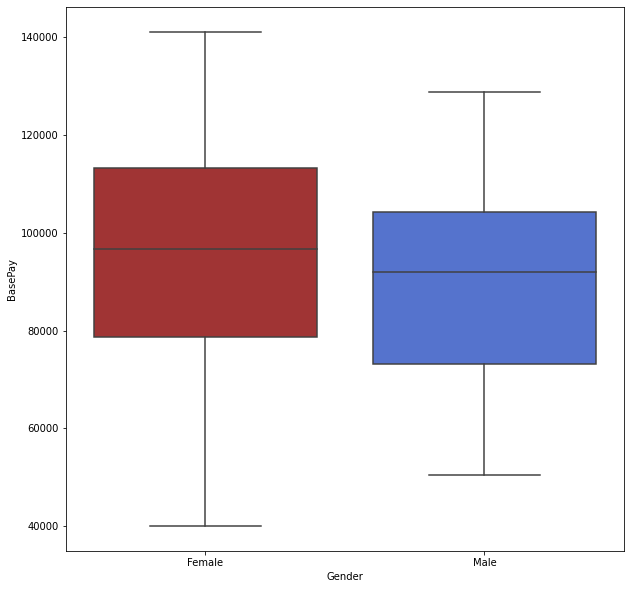

In [ ]:
glassdoor_mask = glassdoor['JobTitle'] == 'Data Scientist'
filtered_glassdoor = glassdoor[glassdoor_mask]
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=filtered_glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

### Designer Gráfico

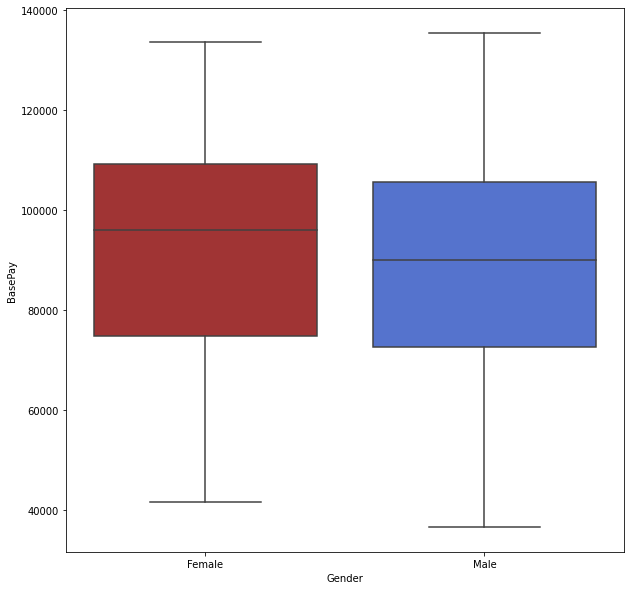

In [ ]:
glassdoor_mask = glassdoor['JobTitle'] == 'Graphic Designer'
filtered_glassdoor = glassdoor[glassdoor_mask]
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=filtered_glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

### Warehouse Associate

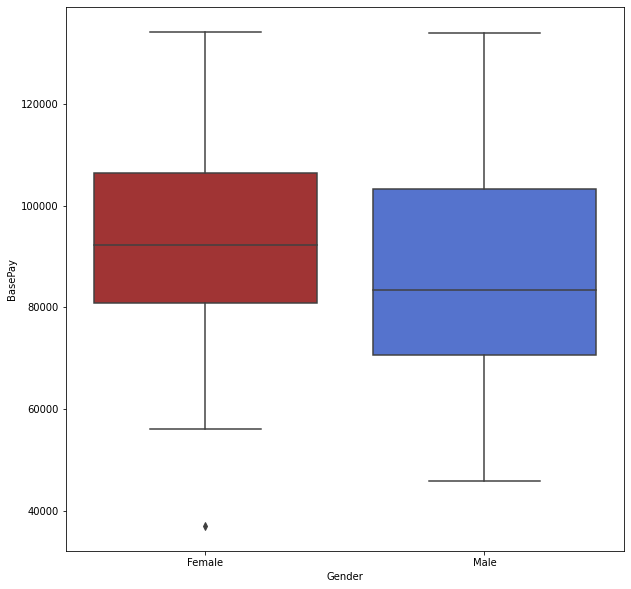

In [ ]:
glassdoor_mask = glassdoor['JobTitle'] == 'Warehouse Associate'
filtered_glassdoor = glassdoor[glassdoor_mask]
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=filtered_glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

### Motorista

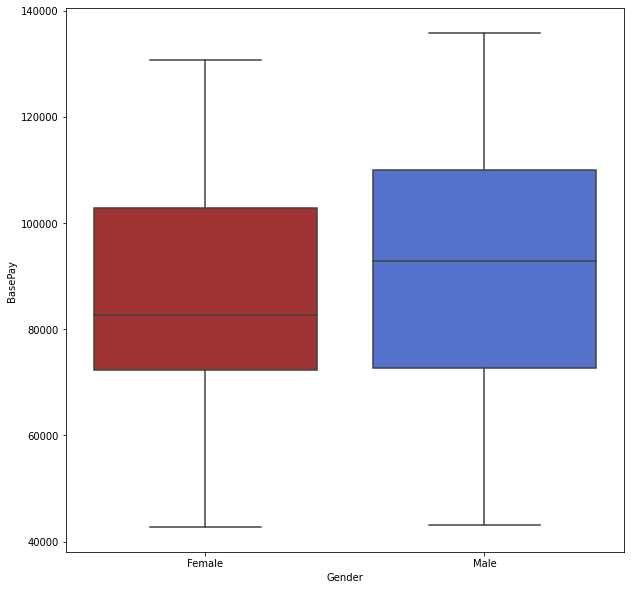

In [ ]:
glassdoor_mask = glassdoor['JobTitle'] == 'Driver'
filtered_glassdoor = glassdoor[glassdoor_mask]
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=filtered_glassdoor, palette=['firebrick', 'royalblue'])
plt.show()

### Engenheiro de Software

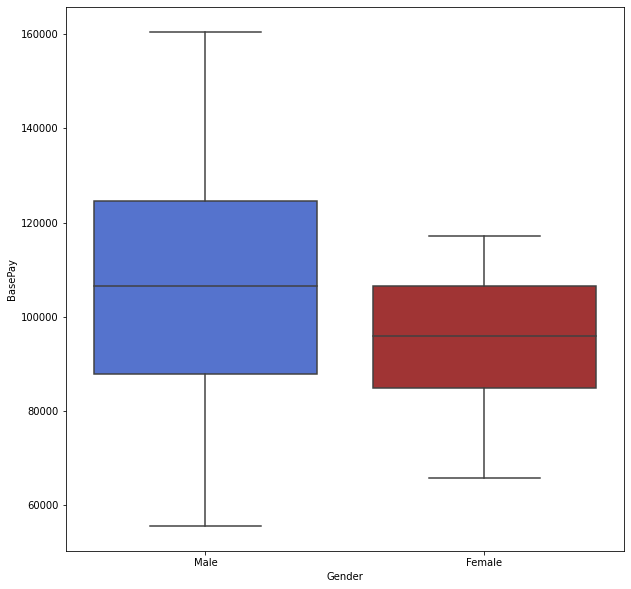

In [ ]:
glassdoor_mask = glassdoor['JobTitle'] == 'Software Engineer'
filtered_glassdoor = glassdoor[glassdoor_mask]
plt.figure(figsize=(10, 10))
sns.boxplot(x='Gender', y='BasePay', data=filtered_glassdoor, palette=['royalblue', 'firebrick'])
plt.show()

# Conclusão

## Os resultados da análise indicam que nos empregos que são aproximadamente 50% ocupados por cada um dos gêneros, as mulheres ganham salários um pouco maiores do que os homens, como Cientista de Dados e Warehouse Associate, porém estes não são os empregos que são melhores remunerados, sendo estes ocupados em sua maior parte por homens. Além disso, as mulheres ganham menores bônus. Portanto, há uma diferença clara de salários entre os gêneros.